In [25]:
from vivarium import Artifact
from db_queries import get_ids, get_outputs
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats

In [26]:
#variables as lists
output_dirs = ['/ihme/costeffectiveness/results/vivarium_gates_bep/lbwsg_acmr/india/2020_02_24_01_05_37/count_data/',
               '/ihme/costeffectiveness/results/vivarium_gates_bep/lbwsg_acmr/mali/2020_02_24_01_07_25/count_data/',
               '/ihme/costeffectiveness/results/vivarium_gates_bep/lbwsg_acmr/pakistan/2020_02_24_01_08_41/count_data/',
               '/ihme/costeffectiveness/results/vivarium_gates_bep/lbwsg_acmr/tanzania/2020_02_24_01_10_34/count_data/']

locations = ['India','Mali','Pakistan','Tanzania']

In [27]:
#In Jupyter Notebook you can execute Terminal commands in the notebook cells by prepending an exclamation point/bang(!) 

%cd /ihme/costeffectiveness/results/vivarium_gates_bep/lbwsg_acmr/india/2020_02_24_01_05_37/count_data/
! ls -halt

#minimal model (baseline)<--check against artifacts/GBD shared functions/Vivarium_inputs

#malnutrition folder is baseline with malnutrition strata
#scenario <--error
#scenario_fixed is the folder we want to look at outputs!

/ihme/costeffectiveness/results/vivarium_gates_bep/lbwsg_acmr/india/2020_02_24_01_05_37/count_data
total 64M
drwxr-xr-x 3 collijk Domain Users  12K Feb 24 13:43 .
drwxr-xr-x 2 collijk Domain Users  512 Feb 24 13:37 .ipynb_checkpoints
-rw-r--r-- 1 collijk Domain Users 348K Feb 24 12:02 gestational_age.csv
-rw-r--r-- 1 collijk Domain Users 1.3M Feb 24 12:02 gestational_age.hdf
-rw-r--r-- 1 collijk Domain Users 337K Feb 24 12:02 birth_weight.csv
-rw-r--r-- 1 collijk Domain Users 1.3M Feb 24 12:02 birth_weight.hdf
-rw-r--r-- 1 collijk Domain Users 707K Feb 24 12:02 cgf_categories.csv
-rw-r--r-- 1 collijk Domain Users 1.8M Feb 24 12:02 cgf_categories.hdf
-rw-r--r-- 1 collijk Domain Users 381K Feb 24 12:02 cgf_z_scores.csv
-rw-r--r-- 1 collijk Domain Users 1.4M Feb 24 12:02 cgf_z_scores.hdf
-rw-r--r-- 1 collijk Domain Users 7.8M Feb 24 12:02 transition_count.csv
-rw-r--r-- 1 collijk Domain Users 9.1M Feb 24 12:02 transition_count.hdf
-rw-r--r-- 1 collijk Domain Users 6.9M Feb 24 12:02 state_

# Explore state_person_time

In [28]:
#EXPLORE STATE PERSON TIME 

state_pt = pd.read_hdf('/ihme/costeffectiveness/results/vivarium_gates_bep/lbwsg_acmr/india/2020_02_24_01_05_37/count_data/state_person_time.hdf')
state_pt.head()

,age_group,treatment_group,mother_status,measure,input_draw,scenario,value
0,1_to_4,bep,malnourished,diarrheal_diseases_person_time,3,baseline,0.000000
1,1_to_4,bep,malnourished,diarrheal_diseases_person_time,3,bep_scale_up,164.670773
2,1_to_4,bep,malnourished,diarrheal_diseases_person_time,3,bep_targeted_scale_up,164.670773
3,1_to_4,bep,malnourished,diarrheal_diseases_person_time,3,mmn_scale_up,0.000000
4,1_to_4,bep,malnourished,diarrheal_diseases_person_time,21,baseline,0.000000


In [29]:
state_pt['measure'].value_counts() 


lower_respiratory_infections_person_time                   8000
susceptible_to_lower_respiratory_infections_person_time    8000
susceptible_to_measles_person_time                         8000
susceptible_to_protein_energy_malnutrition_person_time     8000
recovered_from_measles_person_time                         8000
protein_energy_malnutrition_person_time                    8000
susceptible_to_diarrheal_diseases_person_time              8000
measles_person_time                                        8000
diarrheal_diseases_person_time                             8000
Name: measure, dtype: int64

In [30]:
df = pd.read_hdf('deaths.hdf')
df.head()

,age_group,cause,treatment_group,mother_status,measure,input_draw,scenario,value
0,1_to_4,diarrheal_diseases,bep,malnourished,death,3,baseline,0.0
1,1_to_4,diarrheal_diseases,bep,malnourished,death,3,bep_scale_up,3.0
2,1_to_4,diarrheal_diseases,bep,malnourished,death,3,bep_targeted_scale_up,3.0
3,1_to_4,diarrheal_diseases,bep,malnourished,death,3,mmn_scale_up,0.0
4,1_to_4,diarrheal_diseases,bep,malnourished,death,21,baseline,0.0


In [31]:
deaths = pd.read_hdf('/ihme/costeffectiveness/results/vivarium_gates_bep/scenarios_fixed/india/2020_02_06_17_37_48/count_data/deaths.hdf')
deaths.head()

,age_group,cause,treatment_group,mother_status,measure,input_draw,scenario,value
0,1_to_4,diarrheal_diseases,bep,malnourished,death,3,baseline,0.0
1,1_to_4,diarrheal_diseases,bep,malnourished,death,3,bep_scale_up,3.0
2,1_to_4,diarrheal_diseases,bep,malnourished,death,3,bep_targeted_scale_up,3.0
3,1_to_4,diarrheal_diseases,bep,malnourished,death,3,mmn_scale_up,0.0
4,1_to_4,diarrheal_diseases,bep,malnourished,death,21,baseline,0.0


In [32]:
deaths = pd.read_hdf('/ihme/costeffectiveness/results/vivarium_gates_bep/scenarios_fixed/india/2020_02_06_17_37_48/count_data/deaths.hdf')
deaths = (deaths.where(deaths['scenario'] == 'baseline').dropna()
              .groupby(['cause','input_draw','age_group'], as_index=False).sum()
              .rename(columns={'value':'deaths'}))
deaths

,cause,input_draw,age_group,deaths
0,diarrheal_diseases,3.0,1_to_4,28.0
1,diarrheal_diseases,3.0,1mo_to_6mo,81.0
2,diarrheal_diseases,3.0,6mo_to_1,113.0
3,diarrheal_diseases,3.0,early_neonatal,34.0
4,diarrheal_diseases,3.0,late_neonatal,39.0
5,diarrheal_diseases,21.0,1_to_4,19.0
6,diarrheal_diseases,21.0,1mo_to_6mo,106.0
7,diarrheal_diseases,21.0,6mo_to_1,132.0
8,diarrheal_diseases,21.0,early_neonatal,46.0
9,diarrheal_diseases,21.0,late_neonatal,44.0


In [33]:
deaths['cause'].value_counts() 

protein_energy_malnutrition     250
measles                         250
other_causes                    250
diarrheal_diseases              250
neonatal_disorders              250
meningitis                      250
lower_respiratory_infections    250
Name: cause, dtype: int64

In [34]:
master_deaths = pd.DataFrame()

for i in list(range(len(output_dirs))):
    deaths = pd.read_hdf(output_dirs[i] + 'deaths.hdf')
    deaths = (deaths.where(deaths['scenario'] == 'baseline').dropna()
              .groupby(['cause','input_draw','age_group'], as_index=False).sum()
              .rename(columns={'value':'deaths'}))
    acmr = deaths.groupby(['input_draw','age_group'], as_index=False).sum() 
    acmr['cause'] = 'all'
    deaths = deaths.append(acmr)
    pt = pd.read_hdf(output_dirs[i] + 'person_time.hdf')
    pt = (pt.where(pt['scenario'] == 'baseline').dropna()
          .groupby(['input_draw','age_group'], as_index=False).sum()
          .rename(columns={'value':'person_time'}))
    deaths = deaths.merge(pt, right_on=['input_draw','age_group'],
                       left_on=['input_draw','age_group'])
    deaths['csmr'] = deaths['deaths'] / deaths['person_time']
    deaths = deaths.groupby(['cause','age_group'], as_index=False).mean()
    deaths['location'] = locations[i]
    master_deaths = master_deaths.append(deaths)
master_deaths = master_deaths.sort_values(by='location')
master_deaths.head()

/share/code/nicoly/miniconda/envs/gates_bep/lib/python3.6/site-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


,cause,age_group,deaths,input_draw,person_time,csmr,location
0,all,1_to_4,140.84,469.44,96677.969979,0.001457,India
29,protein_energy_malnutrition,late_neonatal,0.00,469.44,5645.387977,0.000000,India
28,protein_energy_malnutrition,early_neonatal,0.00,469.44,1900.861827,0.000000,India
27,protein_energy_malnutrition,6mo_to_1,29.60,469.44,48584.481383,0.000609,India
26,protein_energy_malnutrition,1mo_to_6mo,24.16,469.44,41354.868388,0.000584,India


In [35]:
#looking into artifacts now

def load_artifact_csmr(cause):
    master_data = pd.DataFrame()
    for i in ['india','mali','pakistan','tanzania']:
        art = Artifact('/share/costeffectiveness/artifacts/vivarium_gates_bep/' + i + '.hdf', 
                   filter_terms=['year_start == 2017', 'age_start < 5'])
        data = art.load('cause.' + cause + '.cause_specific_mortality_rate')
        data = pd.DataFrame(data.mean(axis=1)).reset_index().rename(columns={0:'csmr'})
        data['location'] = i.capitalize()
        data['cause'] = cause
        data['age_group'] = 0
        data['age_group'] = np.where(data['age_start'] == 0, 'early_neonatal', 
                                   np.where(data['age_end'] == 1, '1mo_to_6mo',
                                            np.where(data['age_start'] == 1, '1_to_4', 
                                                    'late_neonatal')))
        master_data = master_data.append(data)
    return master_data

In [36]:
master_art_csmr = pd.DataFrame()
for cause in ['all_causes','diarrheal_diseases',
              'lower_respiratory_infections','meningitis',
              'measles','neonatal_disorders','protein_energy_malnutrition']:
    data = load_artifact_csmr(cause)
    master_art_csmr = master_art_csmr.append(data)
master_art_csmr = master_art_csmr.drop(columns=['age_start','age_end','year_start','year_end'])
master_art_csmr = master_art_csmr.sort_values(by='location')
master_art_csmr.head()

,location,sex,csmr,cause,age_group
0,India,Female,0.903030,all_causes,early_neonatal
4,India,Male,0.000000,measles,early_neonatal
5,India,Male,0.000000,measles,late_neonatal
6,India,Male,0.000239,measles,1mo_to_6mo
7,India,Male,0.000101,measles,1_to_4


In [37]:
master_art_csmr_avg = master_art_csmr.groupby(['location','cause','age_group'], as_index=False).mean()
master_art_csmr_avg.head()

,location,cause,age_group,csmr
0,India,all_causes,1_to_4,0.001530
1,India,all_causes,1mo_to_6mo,0.013731
2,India,all_causes,early_neonatal,0.957582
3,India,all_causes,late_neonatal,0.084038
4,India,diarrheal_diseases,1_to_4,0.000241


PermissionError: [Errno 13] Permission denied: 'acmr.png'

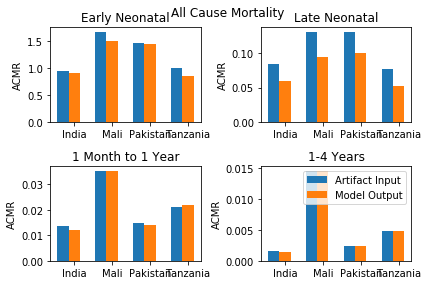

In [38]:
# bar width
barWidth = 0.3

fig,axs = plt.subplots(2,2)

model = master_deaths['csmr'].where(master_deaths['cause'] == 'all').where(master_deaths['age_group'] == 'early_neonatal').dropna()
gbd = master_art_csmr_avg['csmr'].where(master_art_csmr_avg['cause'] == 'all_causes').where(master_art_csmr_avg['age_group'] == 'early_neonatal').dropna()
a = np.arange(len(model))
b = [x + barWidth for x in a]
axs[0,0].bar(a, gbd, width=barWidth)
axs[0,0].bar(b, model, width=barWidth)
axs[0,0].set_title('Early Neonatal')

model = master_deaths['csmr'].where(master_deaths['cause'] == 'all').where(master_deaths['age_group'] == 'late_neonatal').dropna()
gbd = master_art_csmr_avg['csmr'].where(master_art_csmr_avg['cause'] == 'all_causes').where(master_art_csmr_avg['age_group'] == 'late_neonatal').dropna()
a = np.arange(len(model))
b = [x + barWidth for x in a]
axs[0,1].bar(a, gbd, width=barWidth)
axs[0,1].bar(b, model, width=barWidth)
axs[0,1].set_title('Late Neonatal')

model = master_deaths['csmr'].where(master_deaths['cause'] == 'all').where(master_deaths['age_group'] == '1mo_to_6mo').dropna()
gbd = master_art_csmr_avg['csmr'].where(master_art_csmr_avg['cause'] == 'all_causes').where(master_art_csmr_avg['age_group'] == '1mo_to_6mo').dropna()
a = np.arange(len(model))
b = [x + barWidth for x in a]
axs[1,0].bar(a, gbd, width=barWidth)
axs[1,0].bar(b, model, width=barWidth)
axs[1,0].set_title('1 Month to 1 Year')

model = master_deaths['csmr'].where(master_deaths['cause'] == 'all').where(master_deaths['age_group'] == '1_to_4').dropna()
gbd = master_art_csmr_avg['csmr'].where(master_art_csmr_avg['cause'] == 'all_causes').where(master_art_csmr_avg['age_group'] == '1_to_4').dropna()
a = np.arange(len(model))
b = [x + barWidth for x in a]
axs[1,1].bar(a, gbd, width=barWidth)
axs[1,1].bar(b, model, width=barWidth)
axs[1,1].set_title('1-4 Years')


plt.setp(axs, xticks=[r + barWidth for r in range(len(model))], 
         xticklabels=np.unique(master_deaths['location']))

for ax in axs.flat:
    ax.set(ylabel='ACMR')

plt.legend(['Artifact Input','Model Output'])
plt.suptitle('All Cause Mortality',x=0.55)#,x=0.9, y=1.7,fontsize=20)
plt.subplots_adjust(right=1.7, top=1.5)
plt.tight_layout()
plt.savefig('acmr')

In [ ]:
# bar width
barWidth = 0.3

fig,axs = plt.subplots(2,2)

model = master_deaths['csmr'].where(master_deaths['cause'] == 'neonatal_disorders').where(master_deaths['age_group'] == 'early_neonatal').dropna()
gbd = master_art_csmr_avg['csmr'].where(master_art_csmr_avg['cause'] == 'neonatal_disorders').where(master_art_csmr_avg['age_group'] == 'early_neonatal').dropna()
a = np.arange(len(model))
b = [x + barWidth for x in a]
axs[0,0].bar(a, gbd, width=barWidth)
axs[0,0].bar(b, model, width=barWidth)
axs[0,0].set_title('Early Neonatal')

model = master_deaths['csmr'].where(master_deaths['cause'] == 'neonatal_disorders').where(master_deaths['age_group'] == 'late_neonatal').dropna()
gbd = master_art_csmr_avg['csmr'].where(master_art_csmr_avg['cause'] == 'neonatal_disorders').where(master_art_csmr_avg['age_group'] == 'late_neonatal').dropna()
a = np.arange(len(model))
b = [x + barWidth for x in a]
axs[0,1].bar(a, gbd, width=barWidth)
axs[0,1].bar(b, model, width=barWidth)
axs[0,1].set_title('Late Neonatal')

model = master_deaths['csmr'].where(master_deaths['cause'] == 'neonatal_disorders').where(master_deaths['age_group'] == '1mo_to_6mo').dropna()
gbd = master_art_csmr_avg['csmr'].where(master_art_csmr_avg['cause'] == 'neonatal_disorders').where(master_art_csmr_avg['age_group'] == '1mo_to_6mo').dropna()
a = np.arange(len(model))
b = [x + barWidth for x in a]
axs[1,0].bar(a, gbd, width=barWidth)
axs[1,0].bar(b, model, width=barWidth)
axs[1,0].set_title('1 Month to 1 Year')

model = master_deaths['csmr'].where(master_deaths['cause'] == 'neonatal_disorders').where(master_deaths['age_group'] == '1_to_4').dropna()
gbd = master_art_csmr_avg['csmr'].where(master_art_csmr_avg['cause'] == 'neonatal_disorders').where(master_art_csmr_avg['age_group'] == '1_to_4').dropna()
a = np.arange(len(model))
b = [x + barWidth for x in a]
axs[1,1].bar(a, gbd, width=barWidth)
axs[1,1].bar(b, model, width=barWidth)
axs[1,1].set_title('1-4 Years')


plt.setp(axs, xticks=[r + barWidth for r in range(len(model))], 
         xticklabels=np.unique(master_deaths['location']))

for ax in axs.flat:
    ax.set(ylabel='CSMR')

plt.legend(['Artifact Input','Model Output'])
plt.suptitle('Neonatal Disorders Cause-Specific Mortality Rate',x=0.55, y=1)#,fontsize=20)
plt.subplots_adjust(right=1.7, top=1.5)
plt.tight_layout()
plt.savefig('neonatal')

In [ ]:
# bar width
barWidth = 0.3

fig,axs = plt.subplots(2,2)

model = master_deaths['csmr'].where(master_deaths['cause'] == 'diarrheal_diseases').where(master_deaths['age_group'] == 'early_neonatal').dropna()
gbd = master_art_csmr_avg['csmr'].where(master_art_csmr_avg['cause'] == 'diarrheal_diseases').where(master_art_csmr_avg['age_group'] == 'early_neonatal').dropna()
a = np.arange(len(model))
b = [x + barWidth for x in a]
axs[0,0].bar(a, gbd, width=barWidth)
axs[0,0].bar(b, model, width=barWidth)
axs[0,0].set_title('Early Neonatal')

model = master_deaths['csmr'].where(master_deaths['cause'] == 'diarrheal_diseases').where(master_deaths['age_group'] == 'late_neonatal').dropna()
gbd = master_art_csmr_avg['csmr'].where(master_art_csmr_avg['cause'] == 'diarrheal_diseases').where(master_art_csmr_avg['age_group'] == 'late_neonatal').dropna()
a = np.arange(len(model))
b = [x + barWidth for x in a]
axs[0,1].bar(a, gbd, width=barWidth)
axs[0,1].bar(b, model, width=barWidth)
axs[0,1].set_title('Late Neonatal')

model = master_deaths['csmr'].where(master_deaths['cause'] == 'diarrheal_diseases').where(master_deaths['age_group'] == '1mo_to_6mo').dropna()
gbd = master_art_csmr_avg['csmr'].where(master_art_csmr_avg['cause'] == 'diarrheal_diseases').where(master_art_csmr_avg['age_group'] == '1mo_to_6mo').dropna()
a = np.arange(len(model))
b = [x + barWidth for x in a]
axs[1,0].bar(a, gbd, width=barWidth)
axs[1,0].bar(b, model, width=barWidth)
axs[1,0].set_title('1 Month to 1 Year')

model = master_deaths['csmr'].where(master_deaths['cause'] == 'diarrheal_diseases').where(master_deaths['age_group'] == '1_to_4').dropna()
gbd = master_art_csmr_avg['csmr'].where(master_art_csmr_avg['cause'] == 'diarrheal_diseases').where(master_art_csmr_avg['age_group'] == '1_to_4').dropna()
a = np.arange(len(model))
b = [x + barWidth for x in a]
axs[1,1].bar(a, gbd, width=barWidth)
axs[1,1].bar(b, model, width=barWidth)
axs[1,1].set_title('1-4 Years')


plt.setp(axs, xticks=[r + barWidth for r in range(len(model))], 
         xticklabels=np.unique(master_deaths['location']))

for ax in axs.flat:
    ax.set(ylabel='CSMR')

plt.legend(['Artifact Input','Model Output'])
plt.suptitle('Diarrheal Diseases Cause-Specific Mortality Rate',x=0.55, y=1)#,fontsize=20)
plt.subplots_adjust(right=1.7, top=1.5)
plt.tight_layout()
plt.savefig('diarrheal')

In [ ]:
# bar width
barWidth = 0.3

fig,axs = plt.subplots(2,2)

model = master_deaths['csmr'].where(master_deaths['cause'] == 'lower_respiratory_infections').where(master_deaths['age_group'] == 'early_neonatal').dropna()
gbd = master_art_csmr_avg['csmr'].where(master_art_csmr_avg['cause'] == 'lower_respiratory_infections').where(master_art_csmr_avg['age_group'] == 'early_neonatal').dropna()
a = np.arange(len(model))
b = [x + barWidth for x in a]
axs[0,0].bar(a, gbd, width=barWidth)
axs[0,0].bar(b, model, width=barWidth)
axs[0,0].set_title('Early Neonatal')

model = master_deaths['csmr'].where(master_deaths['cause'] == 'lower_respiratory_infections').where(master_deaths['age_group'] == 'late_neonatal').dropna()
gbd = master_art_csmr_avg['csmr'].where(master_art_csmr_avg['cause'] == 'lower_respiratory_infections').where(master_art_csmr_avg['age_group'] == 'late_neonatal').dropna()
a = np.arange(len(model))
b = [x + barWidth for x in a]
axs[0,1].bar(a, gbd, width=barWidth)
axs[0,1].bar(b, model, width=barWidth)
axs[0,1].set_title('Late Neonatal')

model = master_deaths['csmr'].where(master_deaths['cause'] == 'lower_respiratory_infections').where(master_deaths['age_group'] == '1mo_to_6mo').dropna()
gbd = master_art_csmr_avg['csmr'].where(master_art_csmr_avg['cause'] == 'lower_respiratory_infections').where(master_art_csmr_avg['age_group'] == '1mo_to_6mo').dropna()
a = np.arange(len(model))
b = [x + barWidth for x in a]
axs[1,0].bar(a, gbd, width=barWidth)
axs[1,0].bar(b, model, width=barWidth)
axs[1,0].set_title('1 Month to 1 Year')

model = master_deaths['csmr'].where(master_deaths['cause'] == 'lower_respiratory_infections').where(master_deaths['age_group'] == '1_to_4').dropna()
gbd = master_art_csmr_avg['csmr'].where(master_art_csmr_avg['cause'] == 'lower_respiratory_infections').where(master_art_csmr_avg['age_group'] == '1_to_4').dropna()
a = np.arange(len(model))
b = [x + barWidth for x in a]
axs[1,1].bar(a, gbd, width=barWidth)
axs[1,1].bar(b, model, width=barWidth)
axs[1,1].set_title('1-4 Years')


plt.setp(axs, xticks=[r + barWidth for r in range(len(model))], 
         xticklabels=np.unique(master_deaths['location']))

for ax in axs.flat:
    ax.set(ylabel='CSMR')

plt.legend(['Artifact Input','Model Output'])
plt.suptitle('Lower Respiratory Infections Cause-Specific Mortality Rate',x=0.55, y=1)
plt.subplots_adjust(right=1.7, top=1.5)
plt.tight_layout()
plt.savefig('LRI')

In [ ]:
# bar width
barWidth = 0.3

fig,axs = plt.subplots(2,2)

model = master_deaths['csmr'].where(master_deaths['cause'] == 'meningitis').where(master_deaths['age_group'] == 'early_neonatal').dropna()
gbd = master_art_csmr_avg['csmr'].where(master_art_csmr_avg['cause'] == 'meningitis').where(master_art_csmr_avg['age_group'] == 'early_neonatal').dropna()
a = np.arange(len(model))
b = [x + barWidth for x in a]
axs[0,0].bar(a, gbd, width=barWidth)
axs[0,0].bar(b, model, width=barWidth)
axs[0,0].set_title('Early Neonatal')

model = master_deaths['csmr'].where(master_deaths['cause'] == 'meningitis').where(master_deaths['age_group'] == 'late_neonatal').dropna()
gbd = master_art_csmr_avg['csmr'].where(master_art_csmr_avg['cause'] == 'meningitis').where(master_art_csmr_avg['age_group'] == 'late_neonatal').dropna()
a = np.arange(len(model))
b = [x + barWidth for x in a]
axs[0,1].bar(a, gbd, width=barWidth)
axs[0,1].bar(b, model, width=barWidth)
axs[0,1].set_title('Late Neonatal')

model = master_deaths['csmr'].where(master_deaths['cause'] == 'meningitis').where(master_deaths['age_group'] == '1mo_to_6mo').dropna()
gbd = master_art_csmr_avg['csmr'].where(master_art_csmr_avg['cause'] == 'meningitis').where(master_art_csmr_avg['age_group'] == '1mo_to_6mo').dropna()
a = np.arange(len(model))
b = [x + barWidth for x in a]
axs[1,0].bar(a, gbd, width=barWidth)
axs[1,0].bar(b, model, width=barWidth)
axs[1,0].set_title('1 Month to 1 Year')

model = master_deaths['csmr'].where(master_deaths['cause'] == 'meningitis').where(master_deaths['age_group'] == '1_to_4').dropna()
gbd = master_art_csmr_avg['csmr'].where(master_art_csmr_avg['cause'] == 'meningitis').where(master_art_csmr_avg['age_group'] == '1_to_4').dropna()
a = np.arange(len(model))
b = [x + barWidth for x in a]
axs[1,1].bar(a, gbd, width=barWidth)
axs[1,1].bar(b, model, width=barWidth)
axs[1,1].set_title('1-4 Years')


plt.setp(axs, xticks=[r + barWidth for r in range(len(model))], 
         xticklabels=np.unique(master_deaths['location']))

for ax in axs.flat:
    ax.set(ylabel='CSMR')

plt.legend(['Artifact Input','Model Output'])
plt.suptitle('Meningitis Cause-Specific Mortality Rate',x=0.55, y=1)
plt.subplots_adjust(right=1.7, top=1.5)
plt.tight_layout()
plt.savefig('meningitis')

PermissionError: [Errno 13] Permission denied: 'measles.png'

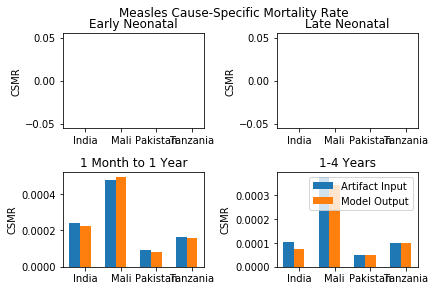

In [40]:
# bar width
barWidth = 0.3

fig,axs = plt.subplots(2,2)

model = master_deaths['csmr'].where(master_deaths['cause'] == 'measles').where(master_deaths['age_group'] == 'early_neonatal').dropna()
gbd = master_art_csmr_avg['csmr'].where(master_art_csmr_avg['cause'] == 'measles').where(master_art_csmr_avg['age_group'] == 'early_neonatal').dropna()
a = np.arange(len(model))
b = [x + barWidth for x in a]
axs[0,0].bar(a, gbd, width=barWidth)
axs[0,0].bar(b, model, width=barWidth)
axs[0,0].set_title('Early Neonatal')

model = master_deaths['csmr'].where(master_deaths['cause'] == 'measles').where(master_deaths['age_group'] == 'late_neonatal').dropna()
gbd = master_art_csmr_avg['csmr'].where(master_art_csmr_avg['cause'] == 'measles').where(master_art_csmr_avg['age_group'] == 'late_neonatal').dropna()
a = np.arange(len(model))
b = [x + barWidth for x in a]
axs[0,1].bar(a, gbd, width=barWidth)
axs[0,1].bar(b, model, width=barWidth)
axs[0,1].set_title('Late Neonatal')

model = master_deaths['csmr'].where(master_deaths['cause'] == 'measles').where(master_deaths['age_group'] == '1mo_to_6mo').dropna()
gbd = master_art_csmr_avg['csmr'].where(master_art_csmr_avg['cause'] == 'measles').where(master_art_csmr_avg['age_group'] == '1mo_to_6mo').dropna()
a = np.arange(len(model))
b = [x + barWidth for x in a]
axs[1,0].bar(a, gbd, width=barWidth)
axs[1,0].bar(b, model, width=barWidth)
axs[1,0].set_title('1 Month to 1 Year')

model = master_deaths['csmr'].where(master_deaths['cause'] == 'measles').where(master_deaths['age_group'] == '1_to_4').dropna()
gbd = master_art_csmr_avg['csmr'].where(master_art_csmr_avg['cause'] == 'measles').where(master_art_csmr_avg['age_group'] == '1_to_4').dropna()
a = np.arange(len(model))
b = [x + barWidth for x in a]
axs[1,1].bar(a, gbd, width=barWidth)
axs[1,1].bar(b, model, width=barWidth)
axs[1,1].set_title('1-4 Years')


plt.setp(axs, xticks=[r + barWidth for r in range(len(model))], 
         xticklabels=np.unique(master_deaths['location']))

for ax in axs.flat:
    ax.set(ylabel='CSMR')

plt.legend(['Artifact Input','Model Output'])
plt.suptitle('Measles Cause-Specific Mortality Rate',x=0.55, y=1)
plt.subplots_adjust(right=1.7, top=1.5)
plt.tight_layout()
plt.savefig('measles')

In [ ]:
# bar width
barWidth = 0.3

fig,axs = plt.subplots(2,2)

model = master_deaths['csmr'].where(master_deaths['cause'] == 'protein_energy_malnutrition').where(master_deaths['age_group'] == 'early_neonatal').dropna()
gbd = master_art_csmr_avg['csmr'].where(master_art_csmr_avg['cause'] == 'protein_energy_malnutrition').where(master_art_csmr_avg['age_group'] == 'early_neonatal').dropna()
a = np.arange(len(model))
b = [x + barWidth for x in a]
axs[0,0].bar(a, gbd, width=barWidth)
axs[0,0].bar(b, model, width=barWidth)
axs[0,0].set_title('Early Neonatal')

model = master_deaths['csmr'].where(master_deaths['cause'] == 'protein_energy_malnutrition').where(master_deaths['age_group'] == 'late_neonatal').dropna()
gbd = master_art_csmr_avg['csmr'].where(master_art_csmr_avg['cause'] == 'protein_energy_malnutrition').where(master_art_csmr_avg['age_group'] == 'late_neonatal').dropna()
a = np.arange(len(model))
b = [x + barWidth for x in a]
axs[0,1].bar(a, gbd, width=barWidth)
axs[0,1].bar(b, model, width=barWidth)
axs[0,1].set_title('Late Neonatal')

model = master_deaths['csmr'].where(master_deaths['cause'] == 'protein_energy_malnutrition').where(master_deaths['age_group'] == '1mo_to_6mo').dropna()
gbd = master_art_csmr_avg['csmr'].where(master_art_csmr_avg['cause'] == 'protein_energy_malnutrition').where(master_art_csmr_avg['age_group'] == '1mo_to_6mo').dropna()
a = np.arange(len(model))
b = [x + barWidth for x in a]
axs[1,0].bar(a, gbd, width=barWidth)
axs[1,0].bar(b, model, width=barWidth)
axs[1,0].set_title('1 Month to 1 Year')

model = master_deaths['csmr'].where(master_deaths['cause'] == 'protein_energy_malnutrition').where(master_deaths['age_group'] == '1_to_4').dropna()
gbd = master_art_csmr_avg['csmr'].where(master_art_csmr_avg['cause'] == 'protein_energy_malnutrition').where(master_art_csmr_avg['age_group'] == '1_to_4').dropna()
a = np.arange(len(model))
b = [x + barWidth for x in a]
axs[1,1].bar(a, gbd, width=barWidth)
axs[1,1].bar(b, model, width=barWidth)
axs[1,1].set_title('1-4 Years')


plt.setp(axs, xticks=[r + barWidth for r in range(len(model))], 
         xticklabels=np.unique(master_deaths['location']))

for ax in axs.flat:
    ax.set(ylabel='CSMR')

plt.legend(['Artifact Input','Model Output'])
plt.suptitle('Protein Energy Malnutrition Cause-Specific Mortality Rate',x=0.55, y=1)
plt.subplots_adjust(right=1.7, top=1.5)
plt.tight_layout()
plt.savefig('protein_energy_malnutrition')

In [39]:
# looks at GBD get_outputs results to spot check... looks reasonable (Mali is higher in older age groups)
gbd = get_outputs(location_id=[163,211,165,189], year_id=2017, gbd_round_id=5, 
                    topic='cause', cause_id=294,
                    measure_id=1, metric_id=3,
                    age_group_id=[2,3,4,5])
gbd

,age_group_id,cause_id,location_id,measure_id,metric_id,sex_id,year_id,acause,age_group_name,cause_name,expected,location_name,measure_name,metric_name,sex,val,upper,lower
0,2,294,163,1,3,3,2017,_all,Early Neonatal,All causes,False,India,Deaths,Rate,Both,0.960155,1.022159,0.907206
1,3,294,163,1,3,3,2017,_all,Late Neonatal,All causes,False,India,Deaths,Rate,Both,0.083584,0.088859,0.078847
2,4,294,163,1,3,3,2017,_all,Post Neonatal,All causes,False,India,Deaths,Rate,Both,0.013652,0.014561,0.012869
3,5,294,163,1,3,3,2017,_all,1 to 4,All causes,False,India,Deaths,Rate,Both,0.001520,0.001714,0.001353
4,2,294,165,1,3,3,2017,_all,Early Neonatal,All causes,False,Pakistan,Deaths,Rate,Both,1.481928,1.804894,1.192477
5,3,294,165,1,3,3,2017,_all,Late Neonatal,All causes,False,Pakistan,Deaths,Rate,Both,0.130167,0.157522,0.105369
6,4,294,165,1,3,3,2017,_all,Post Neonatal,All causes,False,Pakistan,Deaths,Rate,Both,0.014636,0.023067,0.008943
7,5,294,165,1,3,3,2017,_all,1 to 4,All causes,False,Pakistan,Deaths,Rate,Both,0.002430,0.002962,0.001959
8,2,294,189,1,3,3,2017,_all,Early Neonatal,All causes,False,United Republic of Tanzania,Deaths,Rate,Both,1.012747,1.313183,0.788234
9,3,294,189,1,3,3,2017,_all,Late Neonatal,All causes,False,United Republic of Tanzania,Deaths,Rate,Both,0.076383,0.098744,0.059698
